# Futures Trend Following Portfolio

    1. The Security closes with 50/100 ma > 0, buy.
    2. If the Security closes 50/100 ma < 0, sell your long position.
    
    (For a Portfolio of futures.)
    
    NOTE: pinkfish does not yet have full support for futures backtesting, and
    the futures data from yahoo finance isn't very good.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### MICRO FUTURES

In [3]:
# symbol: (description, multiplier)

micro_futures = {
    'MES=F': 'Micro E-mini S&P 500 Index Futures',
    'MNQ=F': 'Micro E-mini Nasdaq-100 Index Futures',
    'M2K=F': 'Micro E-mini Russell 2000 Index Futures',
    'MYM=F': 'Micro E-mini Dow Jones Futures',
    'MGC=F': 'Micro Gold Futures',
    'SIL=F': 'Micro Silver Futures',
    'M6A=F': 'Micro AUD/USD Futures',
    'MSF=F': 'Micro CHF/USD Futures',
    'MCD=F': 'Micro CAD/USD Futures',
    'MSF=F': 'Micro CHF/USD Futures',
    'M6E=F': 'Micro EUR/USD Futures',
    'M6B=F': 'Micro GBP/USD Futures',
    'MIR=F': 'Micro INR/USD Futures'
}

symbols = list(micro_futures)
#symbols = ['MES=F']
capital = 100_000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'sell_short' : False,
    'force_stock_market_calendar' : True,
    'margin' : 2,
    'sma_timeperiod_slow': 50,
    'sma_timeperiod_fast': 10,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed





View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2019-07-16,0,1.13,19712,entry,LONG,M6E=F
1,2019-07-16,1,145.42,255,entry,LONG,MIR=F
2,2019-07-16,2,15.60,422,entry,LONG,SIL=F
3,2019-07-16,3,0.77,29877,entry,LONG,MCD=F
4,2019-07-16,4,0.70,24070,entry,LONG,M6A=F


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2019-07-16,1.13,2019-07-24,1.12,-0.01,-153.75,19712,-153.75,LONG,M6E=F
1,2019-07-16,0.70,2019-08-01,0.68,-0.02,-510.28,24070,-664.04,LONG,M6A=F
2,2019-07-16,145.42,2019-08-05,139.89,-5.53,-1410.15,255,-2074.19,LONG,MIR=F
3,2019-07-16,0.77,2019-08-08,0.76,-0.01,-301.76,29877,-2375.94,LONG,MCD=F
4,2019-07-16,1565.50,2019-08-08,1534.10,-31.40,-188.40,6,-2564.35,LONG,M2K=F


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2022-12-23,101226.06,101226.06,101226.06,73199,-3101.41,1.03,-
2022-12-27,101651.27,101651.27,101651.27,73197,4608.59,1.00,X
2022-12-28,101404.03,101404.03,101404.03,73197,4608.59,1.00,-
2022-12-29,102136.13,102136.13,102136.13,73197,4608.59,1.00,-
2022-12-30,102260.57,102260.57,102260.57,0,102260.57,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                  2019-07-16
end                                                    2022-12-30
beginning_balance                                          100000
ending_balance                                          102260.57
total_net_profit                                          2260.57
gross_profit                                             32337.12
gross_loss                                              -30076.56
profit_factor                                                1.08
return_on_initial_capital                                    2.26
annual_return_rate                                           0.65
trading_period                           3 years 5 months 14 days
pct_time_in_market                                          92.78
margin                                                          2
avg_leverage                                                 1.21
max_leverage                                                 1.91
min_levera

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
M6E=F,-$254.46,0.08,-0.11,-1.35
MIR=F,"-$5,072.54",0.08,-2.24,-26.93
SIL=F,"$3,305.86",0.08,1.46,17.55
MCD=F,-$998.79,0.08,-0.44,-5.30
M6A=F,-$147.49,0.08,-0.07,-0.78
MES=F,"$1,819.00",0.08,0.80,9.66
MNQ=F,$349.00,0.08,0.15,1.85
MSF=F,-$299.33,0.08,-0.13,-1.59
MYM=F,$0.00,0.08,0.00,0.00
M2K=F,$339.00,0.08,0.15,1.80


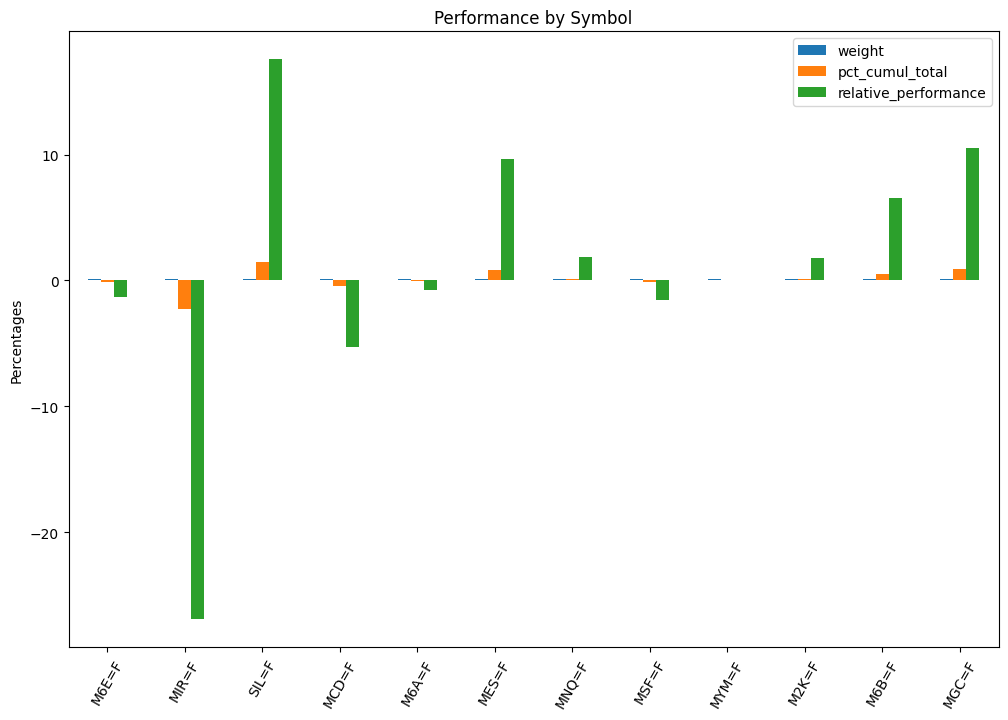

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,M6E=F,MIR=F,SIL=F,MCD=F,M6A=F,MES=F,MNQ=F,MSF=F,MYM=F,M2K=F,M6B=F,MGC=F
M6E=F,1.00,0.32,0.31,0.52,0.62,0.18,0.18,0.78,0.16,0.19,0.66,0.34
MIR=F,0.32,1.00,0.14,0.41,0.41,0.37,0.35,0.20,0.36,0.38,0.36,0.13
SIL=F,0.31,0.14,1.00,0.36,0.41,0.18,0.17,0.35,0.17,0.22,0.31,0.79
MCD=F,0.52,0.41,0.36,1.00,0.75,0.43,0.36,0.42,0.43,0.45,0.60,0.25
M6A=F,0.62,0.41,0.41,0.75,1.00,0.42,0.38,0.53,0.40,0.45,0.69,0.35
MES=F,0.18,0.37,0.18,0.43,0.42,1.00,0.93,0.05,0.96,0.89,0.32,0.08
MNQ=F,0.18,0.35,0.17,0.36,0.38,0.93,1.00,0.08,0.82,0.80,0.30,0.10
MSF=F,0.78,0.20,0.35,0.42,0.53,0.05,0.08,1.00,0.02,0.04,0.54,0.41
MYM=F,0.16,0.36,0.17,0.43,0.40,0.96,0.82,0.02,1.00,0.88,0.31,0.07
M2K=F,0.19,0.38,0.22,0.45,0.45,0.89,0.80,0.04,0.88,1.00,0.33,0.11


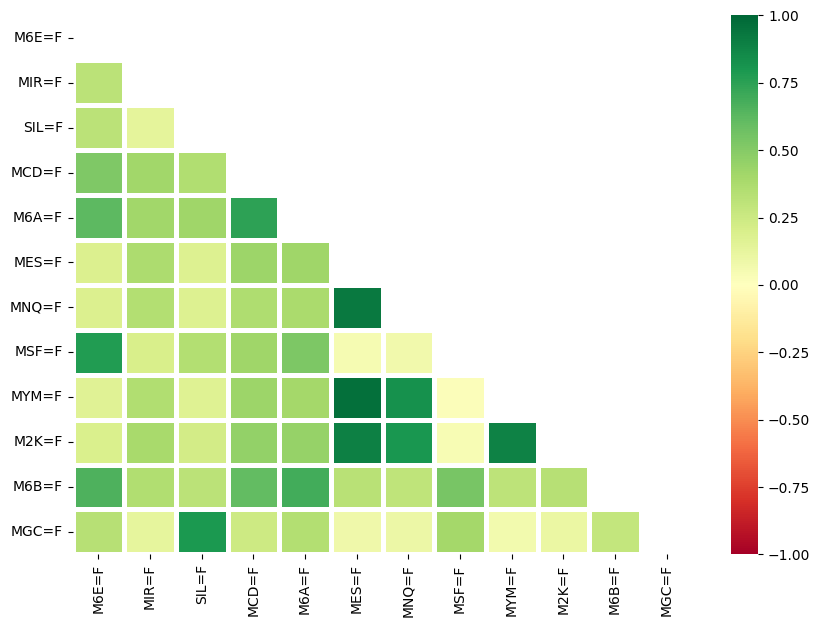

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

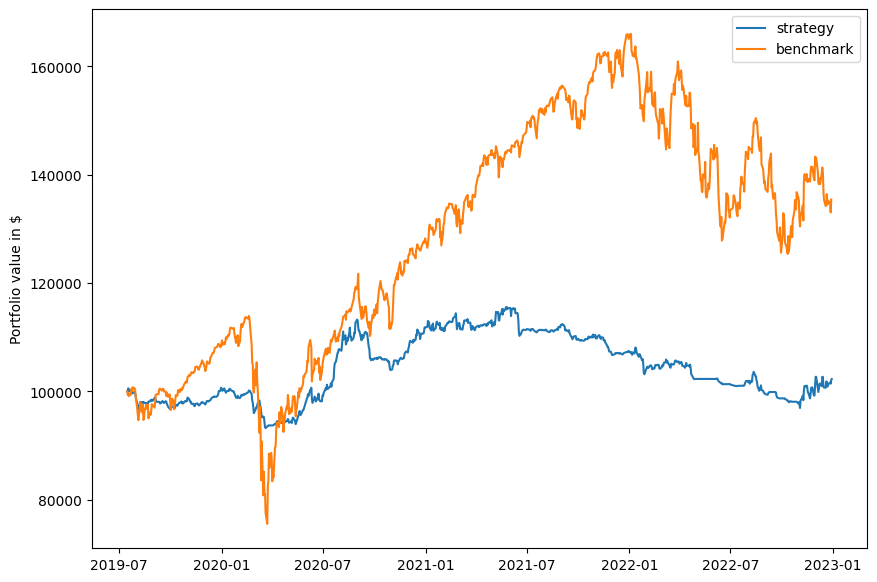

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,0.65,9.17
max_closed_out_drawdown,-16.11,-33.69
annualized_return_over_max_drawdown,0.04,0.27
best_month,10.55,23.05
worst_month,-6.84,-30.97
sharpe_ratio,0.12,0.49
sortino_ratio,0.15,0.60
monthly_std,2.35,5.97
annual_std,10.17,20.22


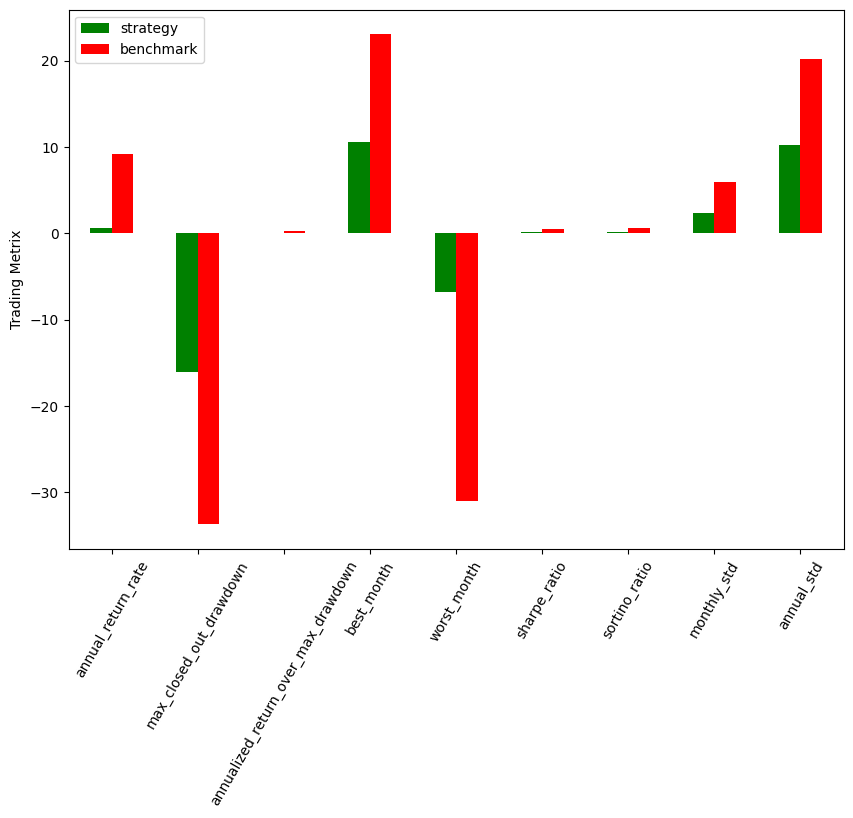

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.12
sharpe_ratio_max        0.23
sharpe_ratio_min        0.02
strategy risk           0.10
instrument risk         0.20
optimal target risk     0.12
half kelly criterion    0.06
aggressive leverage     0.61
moderate leverage       0.31
conservative leverage   0.05
dtype: float64